In [1]:
import numpy as np
import damask

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())
damask3_template_path = "damask3/damask3_template"

The current directory is: 
c:\Users\nguye\Desktop\Crystal-Plasticity-COE-Course\damask3
Moving up to the parent directory
c:\Users\nguye\Desktop\Crystal-Plasticity-COE-Course


### Converting .geom file of DAMASK 2.0.3 to vti file of DAMASK 3.0 alpha 6

In [4]:
material = 'RVE_1_40_D'
grid = damask.Grid.load_ASCII(f'{damask3_template_path}/{material}.geom')
grid.save(f"{damask3_template_path}/{material}.vti")

C:\Users\nguye\AppData\Local\Temp\ipykernel_14676\1612944057.py:2: DeprecationWarning: Support for ASCII-based geom format will be removed in DAMASK 3.0.0
  grid = damask.Grid.load_ASCII(f'{damask3_template_path}/{material}.geom')


### Generating numerics.yaml file of DAMASK 3.0 alpha 6

In [5]:
damask.Config(f"""
grid:
  itmin: 2
  itmax: 250
  maxCutBack: 20
  continueCalculation: 0
""").save(f"{damask3_template_path}/numerics.yaml",default_flow_style = False)

### Generating tensionX.yaml file of DAMASK 3.0 alpha 6

In [6]:
damask.Config("""
solver:
  mechanical: spectral_basic

loadstep:
  - discretization:
      t: 50
      N: 50
    f_out: 2
    boundary_conditions:
      mechanical:
        dot_F: [[x, 0, 0],
                [0, 1.0e-4, 0],
                [0, 0, x]]
        P: [[0, x, x],
            [x, x, x],
            [x, x, 0]]
  - discretization:
      t: 2000
      N: 1000
    f_out: 50
    boundary_conditions:
      mechanical:
        dot_F: [[x, 0, 0],
                [0, 1.0e-4, 0],
                [0, 0, x]]
        P: [[0, x, x],
            [x, x, x],
            [x, x, 0]]
""").save(f"{damask3_template_path}/tensionX.yaml")

### Generating material.yaml file of DAMASK 3.0 alpha 6 (PH)

In [8]:
# N_constitutents = 1 means one phase
# The phase here is aluminum, Al

material = damask.ConfigMaterial("""
homogenization:
  SX:
    N_constituents: 1
    mechanical: {type: pass}

phase:
  Al:
    lattice: cF
    mechanical:
      output: [F, P, F_e, F_p, L_p, O]
      elastic:
        type: Hooke
        C_11:                    107e9
        C_12:                    52e9
        C_44:                    26e9
      plastic:
        type: phenopowerlaw
        Nslip: 12
        gdot0_slip: 1e-3
        n_slip: 20
        tau0_slip: 55e6
        tausat_slip: 150e6
        a_slip: 1.6
        h0_slipslip:             600e6
        interaction_slipslip:    1 1 1 1 1 1
        atol_resistance:         1

""").material_add(O=damask.Rotation.from_random(shape=grid.N_materials),
                  phase='Al',
                  homogenization='SX')
material.save(f"{damask3_template_path}/material.yaml")

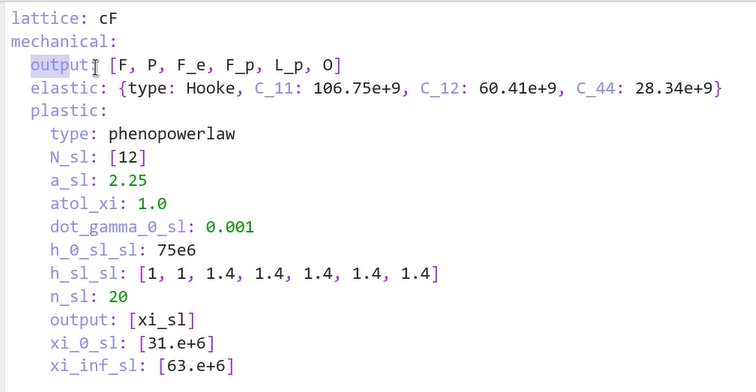

### Generating material.yaml file of DAMASK 3.0 alpha 6 (DB)

In [12]:
material = damask.ConfigMaterial("""
homogenization:
  SX:
    N_constituents: 1
    mechanical:
      type: pass

phase:
  Al:
    lattice: cF
    mechanical:
      output: [F, P, O]
      elastic:
        type: Hooke
        C_11:                    107e9
        C_12:                    52e9
        C_44:                    26e9
      plastic:
        type: dislotwin
        grainsize:                5.25e-6        
        SolidSolutionStrength:    55e6      
        Nslip:                    12
        slipburgers:              25.46e-11        
        rhoedgedip0:              1.0            
        rhoedge0:                 1.0e12         
        v0:                       10e-5          
        Qedge:                    0.8361e-19    
        p_slip:                   0.8          
        q_slip:                   1.5       
        CLambdaSlip:              45          
        D0:                       6.23e-4     
        Qsd:                      1.876e-19    
        Catomicvolume:            4.0            
        Cedgedipmindistance:      7.0             
        atol_rho:                 1.0
        interaction_slipslip:     1 1 1 1 1 1  
""").material_add(O=damask.Rotation.from_random(shape=grid.N_materials),
                  phase='Al',
                  homogenization='SX')
material.save(f"{damask3_template_path}/material.yaml")